# Exercice Numpy 


Dans cet exercice, nous allons travailler avec la série temporelle de température mensuelle à Paris Le Bourget sauvegardée dans le fichier `temp_paris.dat` de 1766 à 2000. 
Nous allons trouver les minima et maxima locaux de la série temporelle. On calculera ensuite des anomalies mensuelles de températures.  

**1- Lire les données et les mettre dans une tableau numpy de taille (`nombre_années * 12,`)**  
On utilisera la fonction de pandas `read_csv`.

In [15]:
%matplotlib inline

import numpy as np                                                               
import pandas as pd     
import matplotlib.pyplot as plt
plt.style.use('ggplot')    

In [16]:
filename = 'temp_paris.dat'
first_yr = 1766                                                                  
last_yr = 2000                                                                   
vec_time = np.arange(first_yr, last_yr + 1, 1./12)                               
tab_pd = pd.read_csv(filename, skiprows=5, header=None, delim_whitespace=True,   
                     index_col=0)                                                
tab = tab_pd.values                                                              
tab1 = tab.ravel()  

**2- Faire un joli plot de la série temporelle**

(1766, 2001)

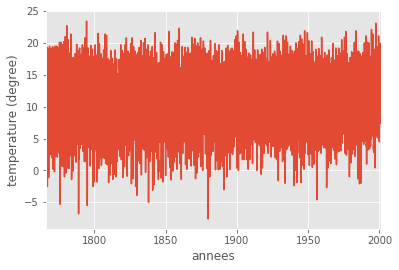

In [17]:
plt.plot(vec_time, tab1);   
plt.xlabel('annees')
plt.ylabel('temperature (degree)')
plt.xlim(first_yr, last_yr + 1)

**3- Centrer et blanchir la série temporelle** 

In [18]:
tab1 = (tab1 - np.mean(tab1)) / np.std(tab1)

**4- Trouver les minima et maxima locaux de la série temporelle**  
On pourra par exemple utiliser `np.diff`.  
Représenter la série temporelle et les extrema trouvés.

(1766, 2001)

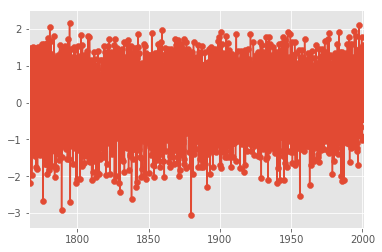

In [19]:
def find_extrema(tt):                                                            
    t_diff = np.diff(tt)                                                         
    prod_diff = t_diff[:-1] * t_diff[1::]                                        
    extrema = np.where(prod_diff < 0)                                            
    return extrema[0] + 1                                                        
                                                                                 
extrema1 = find_extrema(tab1)   
plt.plot(vec_time, tab1)
plt.scatter(vec_time[extrema1], tab1[extrema1])  
plt.xlim(first_yr, last_yr + 1)

Faire la même chose en utilisant les fonctions `argrelmax` et `argrelmin` du module `scipy.signal`.

(1766, 2001)

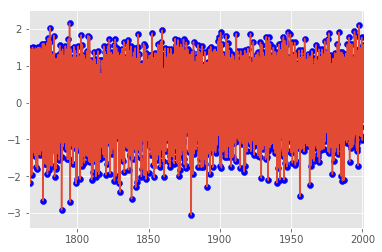

In [21]:
from scipy.signal import argrelmax, argrelmin                                        
max1b = argrelmax(tab1) 
max1b = max1b[0] 
min1b = argrelmin(tab1)                                                
min1b = min1b[0] 

plt.plot(vec_time, tab1)
plt.scatter(vec_time[min1b], tab1[min1b], c='b') 
plt.scatter(vec_time[max1b], tab1[max1b], c='b') 
plt.xlim(first_yr, last_yr + 1)

**5- Lisser le signal et identifier les extrema persistents**  
On pourra utiliser `np.convolve` pour faire une moyenne glissante.   
Etudier la persitance des extrema en fonction de l'importance du lissage.  
Optionnel: illustrer les résultats avec un joli graphique.

[ 0.2  0.2  0.2  0.2  0.2]


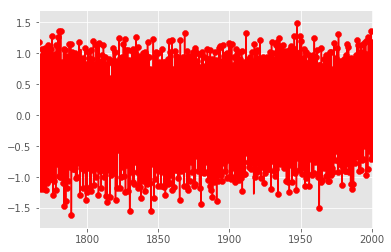

In [23]:
n_lis = 5  
print(1. / n_lis * np.ones(n_lis))
tab2 = np.convolve(tab1, 1. / n_lis * np.ones(n_lis), mode='same')               
plt.plot(vec_time, tab2, 'r')   
plt.xlim(first_yr, last_yr + 1)
                                                                                 
extrema2 = find_extrema(tab2)                                                    
plt.scatter(vec_time[extrema2], tab2[extrema2], c='r')                           
                                                     
range_test = range(10, 50, 5)
extrem_mat = np.zeros((len(range_test), tab2.shape[0]))                                                                                                      
for i, i_lis in enumerate(range_test):                                               
    tt = np.convolve(tab1, 1. / i_lis * np.ones(i_lis), mode='same')             
    extrem = find_extrema(tt) 
    extrem_mat[i, extrem] = 1   

Optionnel: Faire la même chose en utilisant la fonction `butter` et `filtfilt` du module `scipy.signal`.

(1800, 1806)

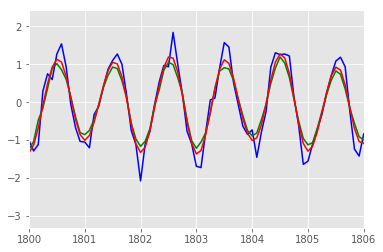

In [24]:
from scipy.signal import butter, filtfilt                                      
b, a = butter(2, 1. / 4)                                                       
y = filtfilt(b, a, tab1)                                                       
plt.figure()                                                                   
plt.plot(vec_time, tab1, 'b')                                                            
plt.plot(vec_time, tab2, 'g')                                                            
plt.plot(vec_time, y, 'r')  
plt.xlim(1800, 1806)

**6- Calcul des anomalies mensuelles**  

Ci-dessus, on a trouvé qu'il faisait le plus chaud en été et le plus froid en hiver...  
Ce qui pourrait être intéressant serait de savoir les mois les plus chaud/froid par rapport "aux normales saisonnières".  
Pour cela, on reprend les données de départ (non normalisées) et on va calculer des anomalies mensuelles. Cela consiste à enlever pour chaque mois de janvier (février, mars, ...) la moyenne calculée sur les mois de janvier (février, mars, ...). Mettre les anomalies dans un tableau de taille (`nombre_années * 12, `) et faire un joli plot de cette nouvelle série temporelle.

(1766, 2001)

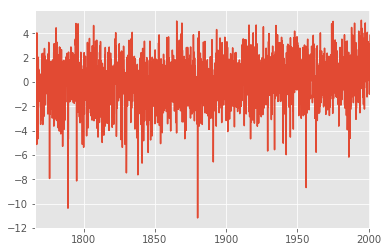

In [25]:
tab_mean = np.mean(tab, axis=0)                                                  
anom = tab - tab_mean                                                            
anom = anom.ravel()                                                              
                                                                                 
plt.figure()                                                                     
plt.plot(vec_time, anom)
plt.xlim(first_yr, last_yr + 1)

Pour chaque mois, trouver l'année la plus chaude et la plus froide.